#**Deep Neural Network**
##**LAB 5: -Tensorflow implementation of logistic regression.**

---

###**Name: - Gaurav Sonawane**

###**PRN: - 20200802154**

**BTech CSE TY**

**DS1**

---

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv('/content/data.csv', header = None)
print(data.head())

   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [3]:
x_orig = data.iloc[:,1:-1].values
  
# Data labels
y_orig = data.iloc[:,-1:].values
  
print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)

Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


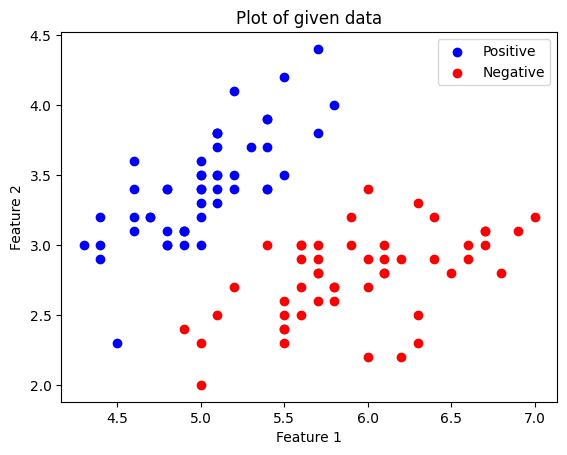

In [4]:
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 1])
  
# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 0])
  
# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')
  
# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')
  
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()
  
plt.show()

In [5]:
oneHot = OneHotEncoder()
  
# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()
  
# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()
  
alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)

m = 100
n = 51
Learning Rate = 0.0035
Number of Epochs = 500


In [6]:
X = tf.placeholder(tf.float32, [None, n])
  
# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])
  
# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))
  
# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))

In [7]:
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
  
# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
                    logits = Y_hat, labels = Y)
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
         learning_rate = alpha).minimize(cost)
  
# Global Variables Initializer
init = tf.global_variables_initializer()

In [8]:
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Lists for storing the changing Cost and Accuracy in every Epoch
    cost_history, accuracy_history = [], []
      
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
          
        # Running the Optimizer
        sess.run(optimizer, feed_dict = {X : x, Y : y})
          
        # Calculating cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
          
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                          tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                                 tf.float32))
          
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
          
        # Displaying result on current Epoch
        if epoch % 100 == 0 and epoch != 0:
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1]))
      
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b)   # Optimized Bias
      
    # Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                      tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                             tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 100 Cost: 136.33413696289062
Epoch 200 Cost: 132.68544006347656
Epoch 300 Cost: 129.771240234375
Epoch 400 Cost: 127.29396057128906

Accuracy: 87.00000047683716 %


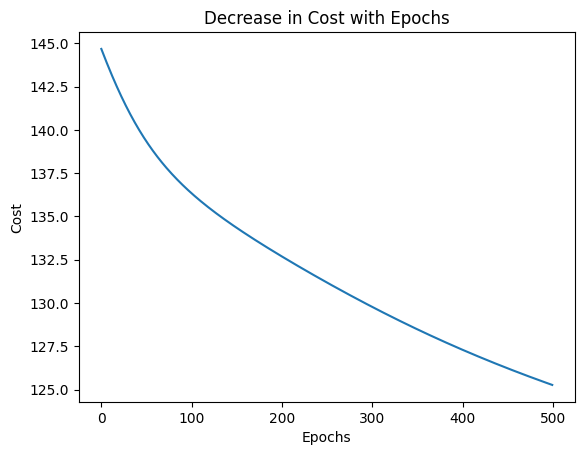

In [9]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')
  
plt.show()

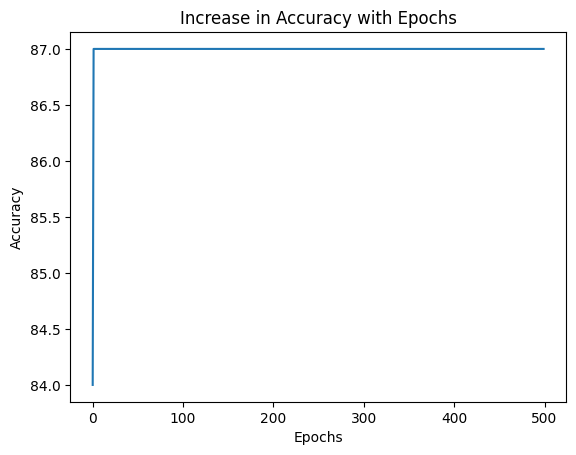

In [10]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
  
plt.show()